# Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

# Why we use Convolution ?
For better our result.

In [12]:
#import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [13]:
dataset=tf.keras.datasets.mnist
(train_x,train_label),(test_x,test_label)=dataset.load_data()

5


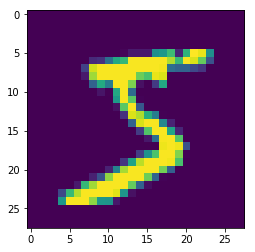

In [14]:
plt.imshow(train_x[0])
print(train_label[0])

The first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

In [15]:
#reshape
train_x=train_x.reshape(60000,28,28,1)
test_x=test_x.reshape(10000,28,28,1)

In [16]:
#normalize dataset
train_x=train_x/255.0
test_x=test_x/255.0

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True
            
callback=myCallback()

Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.


You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.


In [18]:
model=tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')
                                 ])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [20]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
result=model.fit(train_x,train_label,epochs=5,callbacks=[callback])

Epoch 1/5
60000/60000 [==============================] - 59s 977us/sample - loss: 0.1192 - acc: 0.9642
Epoch 2/5
60000/60000 [==============================] - 50s 834us/sample - loss: 0.0408 - acc: 0.9875
Epoch 3/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.0284 - acc: 0.9911
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 48s 804us/sample - loss: 0.0284 - acc: 0.9911


In [21]:
accuracy=result.history['acc']
print("Our train  accuracy = ",accuracy[0]*100,"%")

Our train  accuracy =  96.41500115394592 %


In [22]:
loss,accuracy=model.evaluate(test_x,test_label)
print("Our test  accuracy = ",accuracy*100,"%")

10000/10000 [==============================] - 2s 226us/sample - loss: 0.0306 - acc: 0.9902
Our test  accuracy =  99.01999831199646 %


In [23]:
classifications=model.predict(test_x)

In [24]:
for i in range(12):
    print("Prediction for ",i," images |",np.argmax(classifications[i]))
    print("Acutal for ",i," images     |",test_label[i])
    print("")

Prediction for  0  images | 7
Acutal for  0  images     | 7

Prediction for  1  images | 2
Acutal for  1  images     | 2

Prediction for  2  images | 1
Acutal for  2  images     | 1

Prediction for  3  images | 0
Acutal for  3  images     | 0

Prediction for  4  images | 4
Acutal for  4  images     | 4

Prediction for  5  images | 1
Acutal for  5  images     | 1

Prediction for  6  images | 4
Acutal for  6  images     | 4

Prediction for  7  images | 9
Acutal for  7  images     | 9

Prediction for  8  images | 5
Acutal for  8  images     | 5

Prediction for  9  images | 9
Acutal for  9  images     | 9

Prediction for  10  images | 0
Acutal for  10  images     | 0

Prediction for  11  images | 6
Acutal for  11  images     | 6



Think 
1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

# Visualizing the Convolutions and Pooling
This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

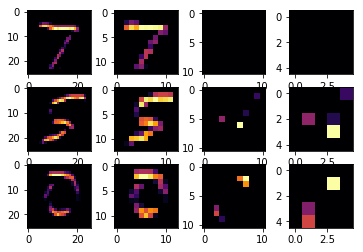

In [35]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    
    
  f1 = activation_model.predict(test_x[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)


  f2 = activation_model.predict(test_x[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
    
  f3 = activation_model.predict(test_x[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

